<a href="https://colab.research.google.com/github/juliobatista04/Evasao_de_clientes/blob/main/Evasao_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd

# Extração de dados

In [81]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados_brutos = pd.read_json(url)
dados_brutos.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


normalizar json

In [82]:
customer_data = pd.json_normalize(dados_brutos['customer'])
phone_data = pd.json_normalize(dados_brutos['phone'])
internet_data = pd.json_normalize(dados_brutos['internet'])
account_data = pd.json_normalize(dados_brutos['account'])

dados_normalizados = pd.concat([dados_brutos.drop(columns=['customer', 'phone', 'internet', 'account']), customer_data, phone_data, internet_data, account_data], axis=1)
dados_normalizados.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Transformação

tipos de dados de cada coluna

In [83]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 






Dicionário de dados

customerID: número de identificação único de cada cliente

Churn: se o cliente deixou ou não a empresa

gender: gênero (masculino e feminino)

SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

Partner: se o cliente possui ou não um parceiro ou parceira

Dependents: se o cliente possui ou não dependentes

tenure: meses de contrato do cliente

PhoneService: assinatura de serviço telefônico

MultipleLines: assisnatura de mais de uma linha de telefone

InternetService: assinatura de um provedor internet

OnlineSecurity: assinatura adicional de segurança online

OnlineBackup: assinatura adicional de backup online

DeviceProtection: assinatura adicional de proteção no dispositivo

TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

StreamingTV: assinatura de TV a cabo

StreamingMovies: assinatura de streaming de filmes

Contract: tipo de contrato

PaperlessBilling: se o cliente prefere receber online a fatura

Charges.Monthly: total de todos os serviços do cliente por mês

PaymentMethod: forma de pagamento

Charges.Total: total gasto pelo cliente

ausencia de valores

In [84]:
dados_normalizados.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


dados duplicados

In [85]:
dados_normalizados.duplicated().sum()


np.int64(0)

mudar a coluna Charges.Total	para se tornar uma coluna númerica

In [86]:
import numpy as np

dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].apply(lambda x: x.replace('.', '').strip())

dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].replace('', np.nan)

dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].astype(np.float64)

dados_normalizados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 




verificar valores com nan


In [87]:
dados_normalizados['Charges.Total'].isna().sum()


np.int64(11)

In [88]:
#colocando mediana em valores com Nan
dados_normalizados['Charges.Total']=dados_normalizados['Charges.Total'].fillna(0)

In [89]:
# criar a coluna "Contas_Diarias"
dados_normalizados['Contas_Diarias']=dados_normalizados['Charges.Monthly']/30
dados_normalizados.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,5933.0,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,5424.0,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,28085.0,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,123785.0,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,2674.0,2.796667


Tradução de colunas

In [90]:
dados_normalizados = dados_normalizados.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'desistência',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'tem_parceiro',
    'Dependents': 'tem_dependentes',
    'Tenure': 'meses_contrato',
    'PhoneService': 'telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'filmes_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_online',
    'PaymentMethod': 'forma_pagamento',
    'Charges.Monthly': 'faturamento_mensal',
    'Charges.Total': 'faturamento_total'
})

dados_normalizados.head(1)

,id_cliente,desistência,genero,idoso,tem_parceiro,tem_dependentes,tenure,telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,forma_pagamento,faturamento_mensal,faturamento_total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,5933.0,2.186667


Conversão de algumas colunas para se tornarem valores binários




In [91]:
# Lista das colunas a transformar
colunas_binarias = [
    'desistência', 'tem_parceiro', 'tem_dependentes', 'multiplas_linhas',
    'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
    'tv_streaming', 'filmes_streaming', 'fatura_online', 'telefone'
]

# Aplicar transformação: 'yes' → 1, tudo o resto → 0
for col in colunas_binarias:
    dados_normalizados[col] = dados_normalizados[col].apply(
        lambda x: 1 if str(x).strip().lower() == 'yes' else 0
    ).astype('int64')

# Exibir o resultado
dados_normalizados.head()


,id_cliente,desistência,genero,idoso,tem_parceiro,tem_dependentes,tenure,telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,forma_pagamento,faturamento_mensal,faturamento_total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,5933.0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,5424.0,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,28085.0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,123785.0,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,2674.0,2.796667


# Carga e Análise (L - Load & Analysis)

Métricas como média, mediana, desvio padrão

In [92]:
dados_normalizados.describe()

,desistência,idoso,tem_parceiro,tem_dependentes,tenure,telefone,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,fatura_online,faturamento_mensal,faturamento_total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,126151.319802,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,192934.187188,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,7483.500000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,36261.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,142375.000000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,867245.000000,3.958333


criação de gráfico de evasão

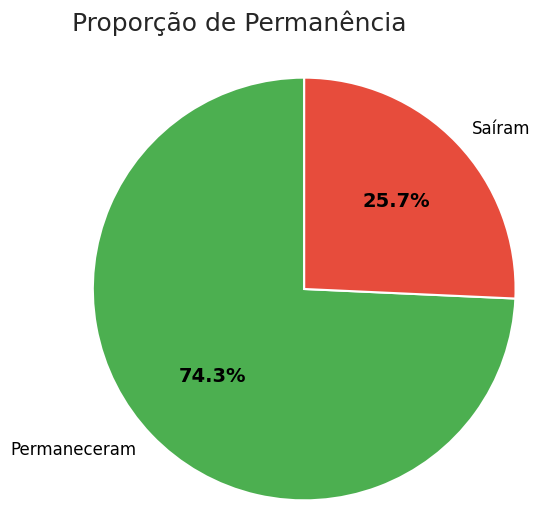

In [93]:
import matplotlib.pyplot as plt

contagem_churn = dados_normalizados['desistência'].value_counts()
labels = ['Permaneceram', 'Saíram']
cores = ['#4CAF50', '#E74C3C']

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    contagem_churn,
    labels=labels,
    colors=cores,
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 12, 'color': 'black'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

ax.set_title('Proporção de Permanência', fontsize=18, loc='left', pad=20)

# Remove o círculo central para visual mais limpo
ax.axis('equal')

fig.patch.set_facecolor('white')
fig.patch.set_edgecolor('lightgray')

fig.savefig('grafico_evasao.jpeg', dpi=300, bbox_inches='tight')

plt.show()


evasão baseada em genero


/tmp/ipython-input-1737887845.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


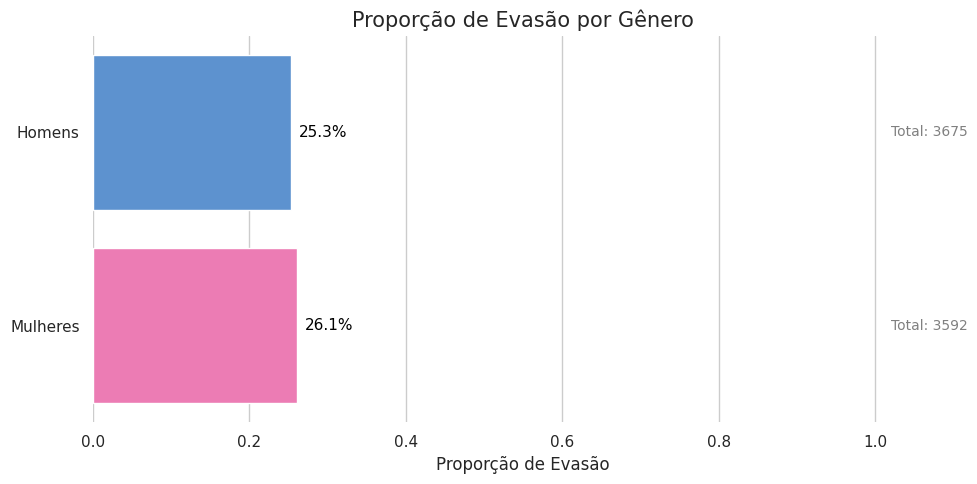

In [94]:
import seaborn as sns


# Copiar e preparar dados
dados_plot = dados_normalizados.copy()
dados_plot['genero'] = dados_plot['genero'].replace({'Male': 'Homens', 'Female': 'Mulheres'})

# Cálculos
proporcao = dados_plot.groupby('genero')['desistência'].mean().reset_index()
proporcao.columns = ['genero', 'proporcao']

total = dados_plot['genero'].value_counts().reset_index()
total.columns = ['genero', 'total']

grafico_df = proporcao.merge(total, on='genero')

grafico_fp = grafico_df.sort_values(by='proporcao', ascending=False).reset_index(drop=True)

# Estilo moderno
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Barras de proporção (horizontal)
cores = {'Homens': '#4A90E2', 'Mulheres': '#FF69B4'}
barras = sns.barplot(
    data=grafico_df,
    y='genero',
    x='proporcao',
    palette=cores,
    ax=ax
)

# Adicionar valores de proporção nas barras
for i, row in grafico_df.iterrows():
    ax.text(
        row['proporcao'] + 0.01, i,
        f"{row['proporcao']:.1%}",
        color='black',
        va='center',
        fontsize=11
    )

# Adicionar total de clientes à direita
for i, row in grafico_df.iterrows():
    ax.text(
        1.02, i,
        f"Total: {row['total']}",
        color='gray',
        va='center',
        fontsize=10
    )

# Limpar layout
ax.set_xlim(0, 1.1)
ax.set_xlabel('Proporção de Evasão', fontsize=12)
ax.set_ylabel('')
ax.set_title('Proporção de Evasão por Gênero', fontsize=15, loc='center')
sns.despine(left=True, bottom=True)

plt.tight_layout()

fig.savefig('grafico_genero.jpeg', dpi=300, bbox_inches='tight')
plt.show()


evasão baseada no método de pagamento

/tmp/ipython-input-1089121543.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


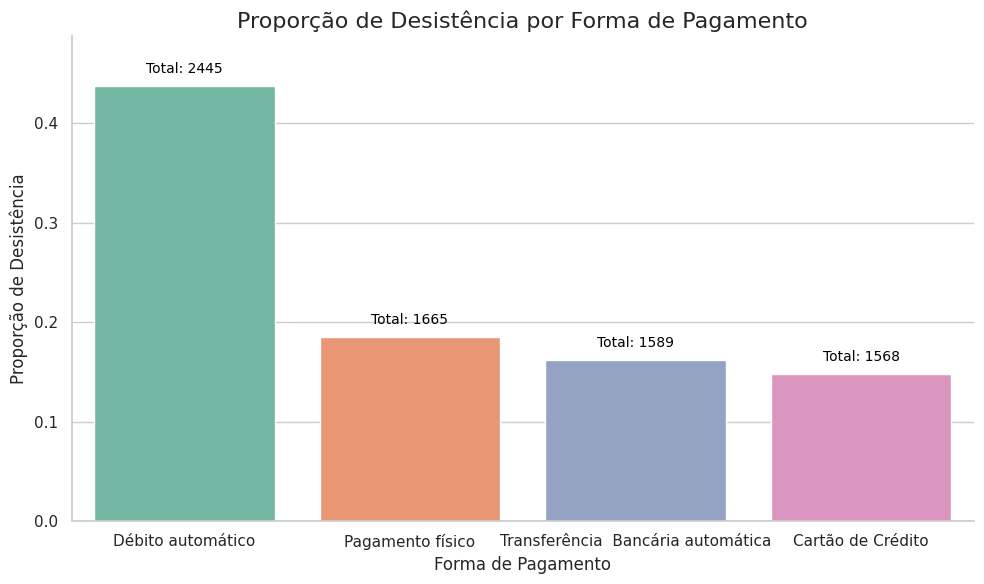

In [95]:

dados_plot = dados_normalizados.copy()
dados_plot['forma_pagamento'] = dados_plot['forma_pagamento'].replace({'Bank transfer (automatic)': 'Transferência  Bancária automática', 'Credit card (automatic)': 'Cartão de Crédito','Electronic check':'Débito automático','Mailed check':'Pagamento físico'})

proporcao_fp = dados_plot.groupby('forma_pagamento')['desistência'].mean().reset_index()
proporcao_fp.columns = ['forma_pagamento', 'proporcao']

total_fp = dados_plot['forma_pagamento'].value_counts().reset_index()
total_fp.columns = ['forma_pagamento', 'total']

grafico_fp = proporcao_fp.merge(total_fp, on='forma_pagamento')
grafico_fp = grafico_fp.sort_values(by='proporcao', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=grafico_fp,
    x='forma_pagamento',
    y='proporcao',
    palette='Set2'
)

for i in range(len(grafico_fp)):
    ax.text(
        i,
        grafico_fp['proporcao'][i] + 0.01,
        f"Total: {grafico_fp['total'][i]}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Ajustes
ax.set_title('Proporção de Desistência por Forma de Pagamento', fontsize=16)
ax.set_ylabel('Proporção de Desistência')
ax.set_xlabel('Forma de Pagamento')
plt.xticks(rotation=0)
ax.set_ylim(0, grafico_fp['proporcao'].max() + 0.05)
sns.despine()
plt.tight_layout()

fig.savefig('grafico_pagamento.jpeg', dpi=300, bbox_inches='tight')
plt.show()


evasão por tipo de contrato

In [96]:
dados_normalizados.tipo_contrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

/tmp/ipython-input-1419017786.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


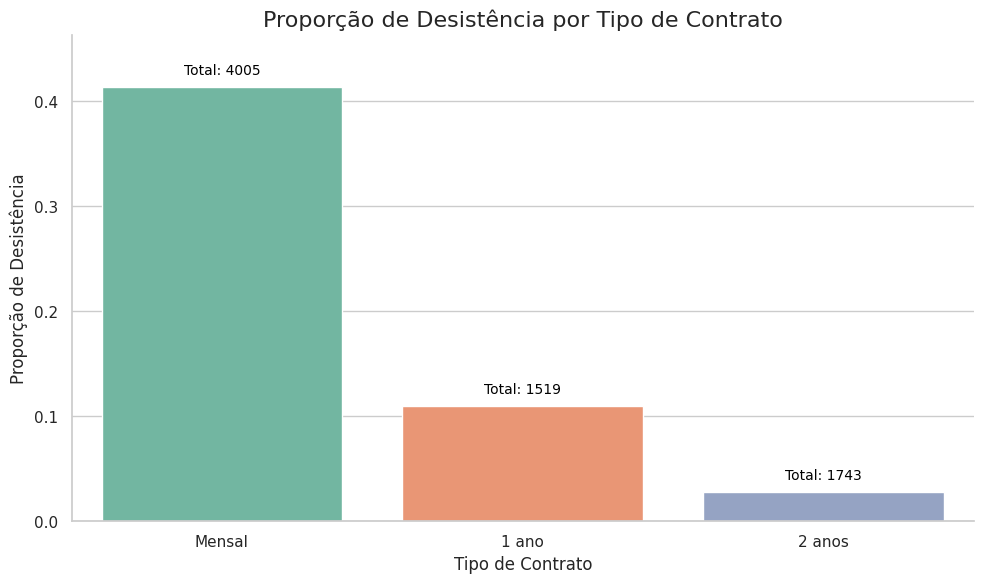

In [97]:

dados_plot = dados_normalizados.copy()
dados_plot['tipo_contrato'] = dados_plot['tipo_contrato'].replace({'One year': '1 ano', 'Month-to-month': 'Mensal','Two year':'2 anos'})

proporcao_fp = dados_plot.groupby('tipo_contrato')['desistência'].mean().reset_index()
proporcao_fp.columns = ['tipo_contrato', 'proporcao']

total_fp = dados_plot['tipo_contrato'].value_counts().reset_index()
total_fp.columns = ['tipo_contrato', 'total']

grafico_fp = proporcao_fp.merge(total_fp, on='tipo_contrato')
grafico_fp = grafico_fp.sort_values(by='proporcao', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=grafico_fp,
    x='tipo_contrato',
    y='proporcao',
    palette='Set2'
)

for i in range(len(grafico_fp)):
    ax.text(
        i,
        grafico_fp['proporcao'][i] + 0.01,
        f"Total: {grafico_fp['total'][i]}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Ajustes
ax.set_title('Proporção de Desistência por Tipo de Contrato', fontsize=16)
ax.set_ylabel('Proporção de Desistência')
ax.set_xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
ax.set_ylim(0, grafico_fp['proporcao'].max() + 0.05)
sns.despine()
plt.tight_layout()

fig.savefig('grafico_contrato.jpeg', dpi=300, bbox_inches='tight')
plt.show()


Cálculo da correlação com a evasão de clientes




In [98]:
# Selecionando somente colunas numéricas
dados_numericos = dados_normalizados.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
matriz_corr = dados_numericos.corr()

# Ordena os fatores mais correlacionados com a evasão
correlacoes_com_desistencia = matriz_corr['desistência'].sort_values(ascending=False)
print(correlacoes_com_desistencia)


desistência             1.000000
Contas_Diarias          0.189866
faturamento_mensal      0.189866
fatura_online           0.186666
idoso                   0.146733
tv_streaming            0.062430
filmes_streaming        0.060586
multiplas_linhas        0.039343
telefone                0.012571
protecao_dispositivo   -0.063452
backup_online          -0.080163
faturamento_total      -0.120152
tem_parceiro           -0.148546
suporte_tecnico        -0.160440
tem_dependentes        -0.161384
seguranca_online       -0.166828
tenure                 -0.344079
Name: desistência, dtype: float64


# Relatório

Este projeto visa analisar e procurar os motivos da evasão de clientes.



 A primeira etapa do projeto foi a de Extração, esse o fundamental para o ínicio de todo projeto.

Primeiro passo: transformar o arquivo JSON em um dataframe;

Segundo passo:  Normalizar as colunas que estavam aninhadas.

---



Tranformação:

Esse responsável pela Limpeza e padronização de dados.
Primeiro passo: Verificar o tipo de dados de cada coluna;

Segundo passo: Criação de um Dicionário de dados de cada coluna.Com o seu nome atual seguido de sua função


Terceiro passo: Verificar se há ausencia de valores ou duplicidade de dados e se é preciso mudar a tipagem de alguma coluna

Quarto passo: Tradução das colunas para o Português;


Quinto Passo: Conversão de algumas colunas para se tornarem valores binários


Sexto passo: Vimos a correlação entre a evasão e os tipos de dados
---




Análise Exploratória de Dados:

 na qual analisamos feitas, incluindo gráficos e visualizações para identificar padrões.

Primeiro passo: Criação de um gráfico de pizza acerca da porcentagem de evasão de clientes

Segundo passo: Criação de um gráfico de barras horizontais acerca da evasão baseada em gênero

Terceiro passo: Criação de um gráfico de barras verticais acerca da evasão baseada no método de pagamento

Quarto passo:  Criação de um gráfico de barras verticais acerca da evasão por tipo de contrato

---
Conclusões e Insights:

Podemos ver que as principais motivações para a evasão de clientes esta atreladado a forma de pagamento "débito auttomático" e assinaturas mensais ,ou seja, aquelas que deixam o usuário atrelado a empresa por um prazo mês a mês

---

Recomendações:

No meu entedimento e com base nos dados e gráficos obtidos a principal forma de cativar e garantir a pemanência de clientes é garantir vantagens em planos anuais, pois é neles que você ganha o compromisso com a empresa e barateia custos para o próprio, e foenecer possivelmente um perìodo de teste para o cliente ver a qualidade do produto.
